In [3]:
# magic command to reload modules
%load_ext autoreload
%autoreload 2

In [4]:
# append sys.path
import sys
sys.path.append('../src')

from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

from simulator.DM_model import DM_model
from parse_data.decode_parameter import decode_mat_fitted_parameters
from parse_data.parse_trial_data import parse_trial_data, compute_subject_acc, correctness_of_array
import os

In [5]:
import matplotlib as mpl
# remove top and right axis from plots
mpl.rcParams["axes.spines.right"] = True
mpl.rcParams["axes.spines.top"] = True

# remove all edges
mpl.rcParams["axes.edgecolor"] = "k"
mpl.rcParams['axes.linewidth'] = 2

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
mpl.rc('font', **font)

In [6]:
!pwd

/Volumes/GoogleDrive/My Drive/02. Master_NSC/02. 2023FS/NSC Thesis/codes/notebook


## decode parameter from .mat file

In [13]:
# load .mat file
filePath = Path('../../data/params/263 models fitPars/data_fitPars_S1.mat')
paramsFitted = decode_mat_fitted_parameters(filePath)

In [53]:
paramsFitted.keys()

dict_keys(['bias', 'sigmas', 'BGLS', 'mechanismsMatrix', 'probRchoiceStoch', 'allModelsList'])

In [34]:
idx = 136

seqC1 = [0, 0.4, -0.4]
seqC2 = [0, 0.1, -0.1]
seqC3 = [0, -0.2, -0.2, 0.2, -0.2, 0.2, 0.2, 0, -0.2, 0.2, -0.2, 0, -0.2, 0, -0.2]
seqC4 = [0, 0.1, 0, 0.1, 0.1, -0.1, -0.1, -0.1, 0.1, 0, -0.1, 0.1, 0, 0, 0]

In [40]:
params = {}
params['bias']   = paramsFitted['bias'][idx]
params['sigmas'] = paramsFitted['sigmas'][idx,:]
params['BGLS']   = paramsFitted['BGLS'][idx, :, :]
params['modelName'] = paramsFitted['allModelsList'][idx]
print('Model: ' + paramsFitted['allModelsList'][idx])
# print(params['BGLS'])

Model: G6


In [41]:
model = BGLS_stoc_model(params=params)
a1, probR1 = model.stoch_simulation(seqC1)
# a2, probR2 = model.stoch_simulation(seqC2)
# a3, probR3 = model.stoch_simulation(seqC3)
# a4, probR4 = model.stoch_simulation(seqC4)

## 设置seeds 正态分布

In [61]:
from scipy.stats import norm
np.random.seed(111)
norm.ppf(np.random.rand(5))

array([ 0.28497976, -0.95784781, -0.16096872,  0.73642013, -0.53789345])

In [62]:
norm.ppf(np.random.rand(5))

array([-1.0400301 , -2.00505985, -0.20131921, -0.71054815, -0.4188683 ])

In [64]:
rn = norm.ppf(np.random.rand(1))
rn

array([-0.713635])

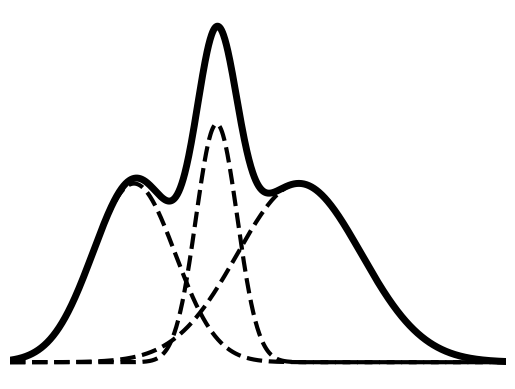

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# generate data
x = np.linspace(-5, 7, 1000)
y1 = 0.3*np.exp(-0.5 * ((x - (-2)) / 1)**2) / np.sqrt(2*np.pi)
y2 = 0.4*np.exp(-0.5 * ((x - 0) / 0.5)**2) / np.sqrt(2*np.pi)
y3 = 0.3*np.exp(-0.5 * ((x - 2) / 1.5)**2) / np.sqrt(2*np.pi)
ysum = y1 + y2 + y3

# plot Gaussian distributions and their summation
fig, ax = plt.subplots()
ax.plot(x, y1, label='Gaussian 1',color='k', linewidth=3, linestyle='--')
ax.plot(x, y2, label='Gaussian 2',color='k', linewidth=3, linestyle='--')
ax.plot(x, y3, label='Gaussian 3',color='k', linewidth=3, linestyle='--')
ax.plot(x, ysum, label='Sum of Gaussians',color='k', linewidth=5)
# ax.legend()
ax.set_xlim([-5,7])
# show plot
ax.axis('off')
# set tranparent background
fig.patch.set_facecolor('none')
plt.show()

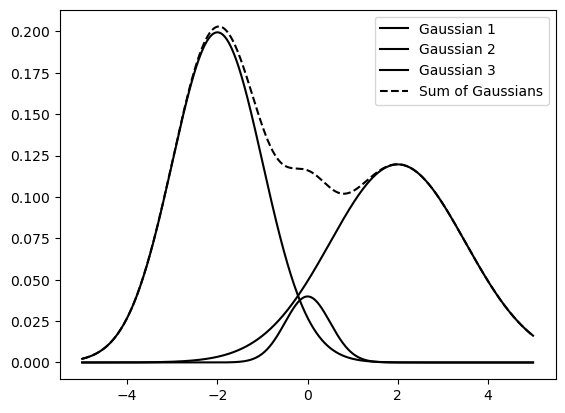

In [45]:
# generate data
mu, sigma = -1, 1
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
y = np.exp(-0.5 * ((x - mu) / sigma)**2)
y1 = y / (sigma * np.sqrt(2*np.pi))

mu, sigma = 0, 0.8
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
y = np.exp(-0.5 * ((x - mu) / sigma)**2)
y2 = y / (sigma * np.sqrt(2*np.pi))

mu, sigma = 1, 0.3
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
y = np.exp(-0.5 * ((x - mu) / sigma)**2)
y3 = y / (sigma * np.sqrt(2*np.pi))

# plot Gaussian
fig, ax = plt.subplots()
ax.plot(x, y1+y2+y3, 'k', linewidth=6, label='Gaussian')
ax.set_xlim([-3, 3])
ax.axis('off')
# set tranparent background
fig.patch.set_facecolor('none')

# show plot
plt.show()

## load trial data and generate input pattern summary

In [78]:
from parse_data.parse_trial_data import parse_trial_data
trial = parse_trial_data('../../data/trials.mat')

idx, _ = np.where(trial['subjID'] == 1)

In [79]:
_dur = trial['dur'][idx]
_nLeft = trial['nLeft'][idx]
_nRight = trial['nRight'][idx]

dur = (trial['dur'][idx] -1) / 14
nLeft = trial['nLeft'][idx] / 14
nRight = trial['nRight'][idx] / 14
nPulse = (_dur-_nLeft-_nRight-1) / 14
hist_nLsame = trial['hist_nLsame'][idx]/(_dur-1)
hist_nLoppo = trial['hist_nLoppo'][idx]/(_dur-1)
hist_nLelse = trial['hist_nLelse'][idx]/(_dur-1)
hist_nRsame = trial['hist_nRsame'][idx]/(_dur-1)
hist_nRoppo = trial['hist_nRoppo'][idx]/(_dur-1)
hist_nRelse = trial['hist_nRelse'][idx]/(_dur-1)

hist_nSame = hist_nLsame + hist_nRsame
hist_nOppo = hist_nLoppo + hist_nRoppo
hist_nElse = hist_nLelse + hist_nRelse

x1 = np.hstack((trial['MS'][idx], dur, nLeft, nRight, nPulse, hist_nLsame, hist_nLoppo, hist_nLelse, hist_nRsame, hist_nRoppo, hist_nRelse))
x2 = np.hstack((trial['MS'][idx], dur, nLeft, nRight, nPulse, hist_nSame, hist_nOppo, hist_nElse))
x1.shape, x2.shape

((14994, 11), (14994, 8))

In [80]:
np.nan_to_num(trial['pulse'][idx], nan=100)

array([[  0. ,  -0.2,  -0.2, ..., 100. , 100. , 100. ],
       [  0. ,   0. ,   0.1, ..., 100. , 100. , 100. ],
       [  0. ,   0.2,   0.2, ..., 100. , 100. , 100. ],
       ...,
       [  0. ,  -0.2,   0.2, ...,  -0.2,   0.2,  -0.2],
       [  0. ,   0. ,   0.1, ...,  -0.1,  -0.1,   0. ],
       [  0. ,   0. ,  -0.4, ...,   0. ,   0.4,   0.4]])

In [81]:
uniques1, counts1 =np.unique(x1, axis=0, return_counts=True)
uniques2, counts2 =np.unique(x2, axis=0, return_counts=True)
uniques3, counts3 =np.unique(np.nan_to_num(trial['pulse'][idx], nan=100), axis=0, return_counts=True)
counts1.shape, counts2.shape, counts3.shape

((6116,), (4188,), (10049,))

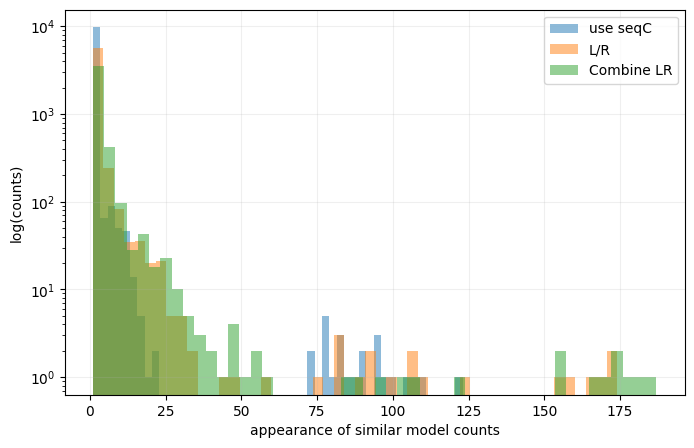

In [33]:
# two subplots
f, ax = plt.subplots(1, figsize=(8,5))
ax.hist(counts3, bins=50, alpha=0.5, label='use seqC')
ax.hist(counts1, bins=50, alpha=0.5, label='L/R')
ax.hist(counts2, bins=50, alpha=0.5, label='Combine LR')

# ax1.plot(counts1)
# ax.plot(counts2)

ax.set_yscale('log')

ax.set_xlabel('appearance of similar model counts')
ax.set_ylabel('log(counts)')
# ax.set_ylabel('log(counts)')

ax.grid(alpha=0.2)

ax.legend()

plt.subplots_adjust(hspace=0.3)

## 数据信息提取 summary input data (general case)

In [160]:
import numpy as np

seqC = np.array([[0, 0.4, -0.4, 0.4, 0.4, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
                 [0, -0.4, -0.4, -0.4, -0.4, 0, 0.4, 0.4, -0.4, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]])

roll_value = 0
seqCrolled = np.roll(seqC, 1, axis=1)
seqCrolled[:, 0] = roll_value
seqCrolled = seqC * seqCrolled

seqCrolled

array([[ 0.  ,  0.  , -0.16, -0.16,  0.16,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan],
       [ 0.  , -0.  ,  0.16,  0.16,  0.16, -0.  ,  0.  ,  0.16, -0.16,
          nan,   nan,   nan,   nan,   nan,   nan]])

In [4]:
import numpy as np

seqC = np.array([[0, 0.4, -0.4, 0.4, 0.4, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
                 [0, -0.2, -0.2, -0.2, -0.2, 0, 0.2, 0.2, -0.2, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]])

# seqC = trial['pulse'][:2,:]

MS      = np.apply_along_axis(lambda x: np.unique(np.abs(x[(~np.isnan(x))&(x!=0)])), axis=1, arr=seqC).reshape(-1)
_dur    = np.apply_along_axis(lambda x: np.sum(~np.isnan(x)), axis=1, arr=seqC)
_nLeft  = np.apply_along_axis(lambda x: np.sum(x<0), axis=1, arr=seqC)
_nRight = np.apply_along_axis(lambda x: np.sum(x>0), axis=1, arr=seqC)
_nPulse = _dur - _nLeft - _nRight

hist_nSame  = np.apply_along_axis(lambda x: np.sum(x*np.append(0, x[0:-1])>0), axis=1, arr=seqC)/(_dur-1)
hist_nLsame = np.apply_along_axis(lambda x: np.sum((x*np.append(0, x[0:-1])>0) & (x<0)), axis=1, arr=seqC)/(_dur-1)
hist_nRsame = np.apply_along_axis(lambda x: np.sum((x*np.append(0, x[0:-1])>0) & (x>0)), axis=1, arr=seqC)/(_dur-1)

hist_nOppo  = np.apply_along_axis(lambda x: np.sum(x*np.append(0, x[0:-1])<0), axis=1, arr=seqC)/(_dur-1)
hist_nLoppo = np.apply_along_axis(lambda x: np.sum((x*np.append(0, x[0:-1])<0) & (x<0)), axis=1, arr=seqC)/(_dur-1)
hist_nRoppo = np.apply_along_axis(lambda x: np.sum((x*np.append(0, x[0:-1])<0) & (x>0)), axis=1, arr=seqC)/(_dur-1)

hist_nElse  = np.apply_along_axis(lambda x: np.sum( (x*np.append(0, x[0:-1])==0) & (x!=0) ), axis=1, arr=seqC)/(_dur-1)
hist_nLelse = np.apply_along_axis(lambda x: np.sum( (x*np.append(0, x[0:-1])==0) & (x<0) ), axis=1, arr=seqC)/(_dur-1)
hist_nRelse = np.apply_along_axis(lambda x: np.sum( (x*np.append(0, x[0:-1])==0) & (x>0) ), axis=1, arr=seqC)/(_dur-1)

dur     = (_dur-1)/14
nLeft   = _nLeft/14
nRight  = _nRight/14
nPulse  = (_dur-1-_nLeft-_nRight)/14

x1 = np.vstack((MS, dur, nLeft, nRight, nPulse, hist_nLsame, hist_nLoppo, hist_nLelse, hist_nRsame, hist_nRoppo, hist_nRelse)).T
x2 = np.vstack((MS, dur, nLeft, nRight, nPulse, hist_nSame, hist_nOppo, hist_nElse)).T
x1, x2

(array([[0.4       , 0.28571429, 0.07142857, 0.21428571, 0.        ,
         0.        , 0.25      , 0.        , 0.25      , 0.25      ,
         0.25      ],
        [0.2       , 0.57142857, 0.35714286, 0.14285714, 0.07142857,
         0.375     , 0.125     , 0.125     , 0.125     , 0.        ,
         0.125     ]]),
 array([[0.4       , 0.28571429, 0.07142857, 0.21428571, 0.        ,
         0.25      , 0.5       , 0.25      ],
        [0.2       , 0.57142857, 0.35714286, 0.14285714, 0.07142857,
         0.5       , 0.125     , 0.25      ]]))

## test sequence_pattern_summary function output

In [5]:
from simulator.seqC_pattern_summary import *
seqC_pattern_summary(seqC, summaryType=2)

array([[0.4       , 0.28571429, 0.07142857, 0.21428571, 0.        ,
        0.25      , 0.5       , 0.25      ],
       [0.2       , 0.57142857, 0.35714286, 0.14285714, 0.07142857,
        0.5       , 0.125     , 0.25      ]])

In [10]:
from parse_data.parse_trial_data import parse_trial_data
trial = parse_trial_data('../../data/trials.mat')

idx, _ = np.where(trial['subjID'] == 1)
seqC = trial['pulse'][idx]

In [14]:
x_c = seqC_pattern_summary(seqC, summaryType=2)

(14994, 8)

## check prior range

In [15]:
filePath = Path('../../data/params/263 models fitPars/data_fitPars_S1.mat')
paramsFitted = decode_mat_fitted_parameters(filePath)

In [17]:
paramsFitted.keys()

dict_keys(['bias', 'sigmas', 'BGLS', 'mechanismsMatrix', 'probRchoiceStoch', 'allModelsList'])

In [83]:
def min_ignore_nan(x):
    x = x[~np.isnan(x)]
    if len(x) == 0:
        return np.nan
    else:
        return np.min(x)

def max_ignore_nan(x):
    x = x[~np.isnan(x)]
    if len(x) == 0:
        return np.nan
    else:
        return np.max(x)
    
key = 'bias'
print(f"{'bias range':<15}",f'min {np.min(paramsFitted[key]):5f}', f' max {np.max(paramsFitted[key]):9.5f}')
key = 'sigmas'
print(f"{'sigma_0 range':<15}",f'min {np.min(paramsFitted[key][:,0]):9.5f}', f' max {np.max(paramsFitted[key][:,0]):9.5f}','\n'\
      f"{'sigma_1 range':<15}",f'min {np.min(paramsFitted[key][:,1]):9.5f}', f' max {np.max(paramsFitted[key][:,1]):9.5f}','\n'\
      f"{'sigma_2 range':<15}",f'min {np.min(paramsFitted[key][:,2]):9.5f}', f' max {np.max(paramsFitted[key][:,2]):9.5f}')
key = 'BGLS'
print(f"{'B range':<15}",f'min {min_ignore_nan(paramsFitted[key][:,0,:]):9.5f}', f' max {max_ignore_nan(paramsFitted[key][:,0,:]):9.5f}')
print(f"{'G range':<15}",f'min {min_ignore_nan(paramsFitted[key][:,1,:]):9.5f}', f' max {max_ignore_nan(paramsFitted[key][:,1,:]):9.5f}')
print(f"{'L range':<15}",f'min {min_ignore_nan(paramsFitted[key][:,2,:]):9.5f}', f' max {max_ignore_nan(paramsFitted[key][:,2,:]):9.5f}')
print(f"{'S range':<15}",f'min {min_ignore_nan(paramsFitted[key][:,3,:]):9.5f}', f' max {max_ignore_nan(paramsFitted[key][:,3,:]):9.5f}')
print(f"{'Sx range':<15}",f'min {min_ignore_nan(paramsFitted[key][:,4,:]):9.5f}', f' max {max_ignore_nan(paramsFitted[key][:,4,:]):9.5f}')
print(f"{'Sxx range':<15}",f'min {min_ignore_nan(paramsFitted[key][:,5,:]):9.5f}', f' max {max_ignore_nan(paramsFitted[key][:,5,:]):9.5f}')

bias range      min -0.396133  max   1.36959
sigma_0 range   min   0.00208  max  69.45161 
sigma_1 range   min   0.00000  max   0.00000 
sigma_2 range   min -12.38668  max   1.33501
B range         min   0.19020  max   8.95731
G range         min -37.73102  max  63.08654
L range         min  -7.77009  max   4.73527
S range         min -21.59422  max  10.53561
Sx range        min -20.96176  max   4.67929
Sxx range       min  -2.17238  max  11.20960


In [105]:
idx_L0_model = paramsFitted['allModelsList'].index('L0')
print(f'L0 model ID: {idx_L0_model}')

print(f'{"bias:":<8}', f"{paramsFitted['bias'][idx_L0_model]:>9.5f}")
print(f'{"sigma0:":<8}', f"{paramsFitted['sigmas'][:,0][idx_L0_model]:>9.5f}")
print(f'{"sigma1:":<8}', f"{paramsFitted['sigmas'][:,1][idx_L0_model]:>9.5f}")
print(f'{"sigma2:":<8}', f"{paramsFitted['sigmas'][:,2][idx_L0_model]:>9.5f}")

print(f'{"B:":<8}', end=' ')
for val in paramsFitted['BGLS'][idx_L0_model,0,:]:
    print(f"{val:>9.5f}", end=' ')
print()

print(f'{"G:":<8}', end=' ')
for val in paramsFitted['BGLS'][idx_L0_model,1,:]:
    print(f"{val:>9.5f}", end=' ')
print()

print(f'{"L:":<8}', end=' ')
for val in paramsFitted['BGLS'][idx_L0_model,2,:]:
    print(f"{val:>9.5f}", end=' ')
print()

print(f'{"S:":<8}', end=' ')
for val in paramsFitted['BGLS'][idx_L0_model,3,:]:
    print(f"{val:>9.5f}", end=' ')
print()

print(f'{"Sx:":<8}', end=' ')
for val in paramsFitted['BGLS'][idx_L0_model,4,:]:
    print(f"{val:>9.5f}", end=' ')
print()

print(f'{"Sxx:":<8}', end=' ')
for val in paramsFitted['BGLS'][idx_L0_model,5,:]:
    print(f"{val:>9.5f}", end=' ')
print()

L0 model ID: 213
bias:      0.00993
sigma0:    0.00430
sigma1:    0.00000
sigma2:    1.33501
B:             nan       nan       nan       nan       nan       nan       nan       nan 
G:             nan       nan       nan       nan       nan       nan       nan       nan 
L:         3.57432       nan       nan       nan       nan       nan       nan       nan 
S:             nan       nan       nan       nan       nan       nan       nan       nan 
Sx:            nan       nan       nan       nan       nan       nan       nan       nan 
Sxx:           nan       nan       nan       nan       nan       nan       nan       nan 


## prepare input for model

In [93]:
import re

def _decode_BGLSON_from_array(params, modelName):

    nan_mat = np.full((6, 8), np.nan)

    params_temp = params[4:]

    # parse the model name
    ns = re.search(r'B(.)G(.)L(.)S(.)O(.)N(.)', modelName).groups()
    _sum = sum([int(x)+1 for x in ns if x != '-'])

    assert _sum+4==len(params), 'input parameters dimension do not match the model name'

    for i, n in enumerate(ns):
        if n != '-':
            nan_mat[i, :int(n)+1] = params_temp[:int(n)+1]
            params_temp = params_temp[int(n)+1:]

    return nan_mat

modelName = 'B-G-L0S-O-N-'
params = [0.00993, 0.00430, 0.00000, 1.33501, 3.57432]
BGLSON = decode_params_from_array(params, modelName)
print(BGLSON)

# input parameters in the format of array
from simulator.BGLS_stoc_model import BGLS_stoc_model
model = BGLS_stoc_model(params, modelName=modelName)
print(params, model.bias, model.sigmas, model.BGLSON)

[[    nan     nan     nan     nan     nan     nan     nan     nan]
 [    nan     nan     nan     nan     nan     nan     nan     nan]
 [3.57432     nan     nan     nan     nan     nan     nan     nan]
 [    nan     nan     nan     nan     nan     nan     nan     nan]
 [    nan     nan     nan     nan     nan     nan     nan     nan]
 [    nan     nan     nan     nan     nan     nan     nan     nan]]
[0.00993, 0.0043, 0.0, 1.33501, 3.57432] 0.00993 [0.0043  0.      1.33501] [[    nan     nan     nan     nan     nan     nan     nan     nan]
 [    nan     nan     nan     nan     nan     nan     nan     nan]
 [3.57432     nan     nan     nan     nan     nan     nan     nan]
 [    nan     nan     nan     nan     nan     nan     nan     nan]
 [    nan     nan     nan     nan     nan     nan     nan     nan]
 [    nan     nan     nan     nan     nan     nan     nan     nan]]


In [91]:
# input parameters in the format of dictionary
from parse_data.decode_parameter import decode_mat_fitted_parameters
paramsFitted = decode_mat_fitted_parameters('../../data/params/263 models fitPars/data_fitPars_S1.mat')
idx = 132
params = dict(bias = paramsFitted['bias'][idx],
              sigmas = paramsFitted['sigmas'][idx,:],
              BGLS = paramsFitted['BGLS'][idx, :, :], 
              modelName = paramsFitted['allModelsList'][idx])
              
model = BGLS_stoc_model(params)
print(model.bias)
print(model.sigmas)
print(model.BGLSON)
print(model.modelName)

0.09178933571410028
[0.28007425 0.         0.        ]
[[        nan         nan         nan         nan         nan         nan
          nan         nan]
 [ 2.25003548 -1.59670446  3.47533055         nan         nan         nan
          nan         nan]
 [        nan         nan         nan         nan         nan         nan
          nan         nan]
 [        nan         nan         nan         nan         nan         nan
          nan         nan]
 [        nan         nan         nan         nan         nan         nan
          nan         nan]
 [        nan         nan         nan         nan         nan         nan
          nan         nan]]
G2


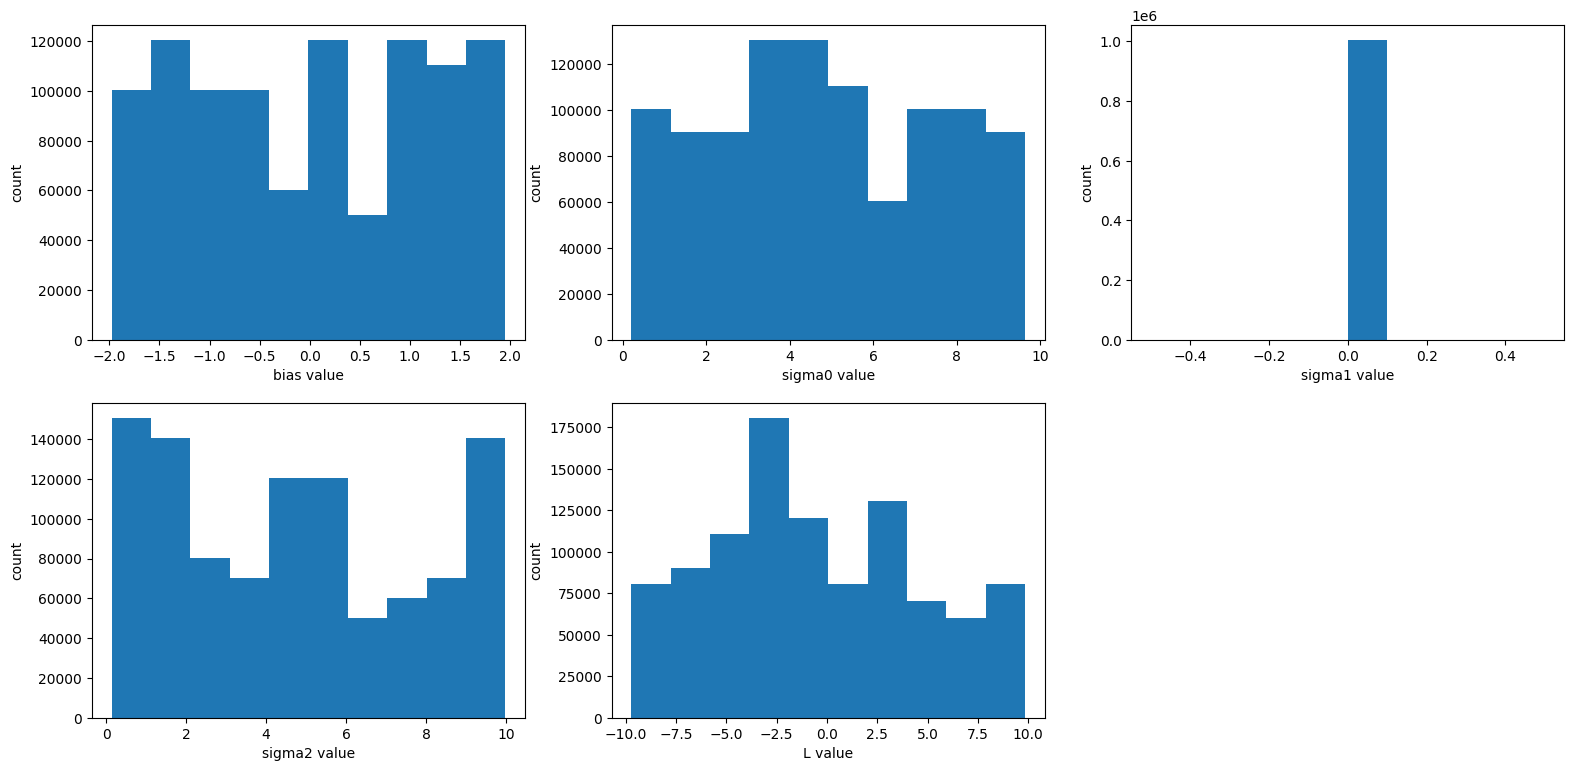

In [85]:
# # colors for traces
# col_min = 2
# num_colors = 5
# cm1 = mpl.cm.Blues
# col1 = [cm1(1.0 * i / num_colors) for i in range(col_min, num_colors)]

fig = plt.figure(figsize=(19, 9))
gs = mpl.gridspec.GridSpec(2,3)
for i in range(2):
    for j in range(3):
        
        if i*3+j<5:
            ax = plt.subplot(gs[i,j])
            plt.hist(theta[:, i*3+j],bins=10)
            
        if i*3+j == 0:
            plt.xlabel('bias value')
        if i*3+j == 1:
            plt.xlabel('sigma0 value')
        if i*3+j == 2:
            plt.xlabel('sigma1 value')
        if i*3+j == 3:
            plt.xlabel('sigma2 value')
        if i*3+j == 4:
            plt.xlabel('L value')
        plt.ylabel('count')



0
1
2
3
4
5
6
7
8


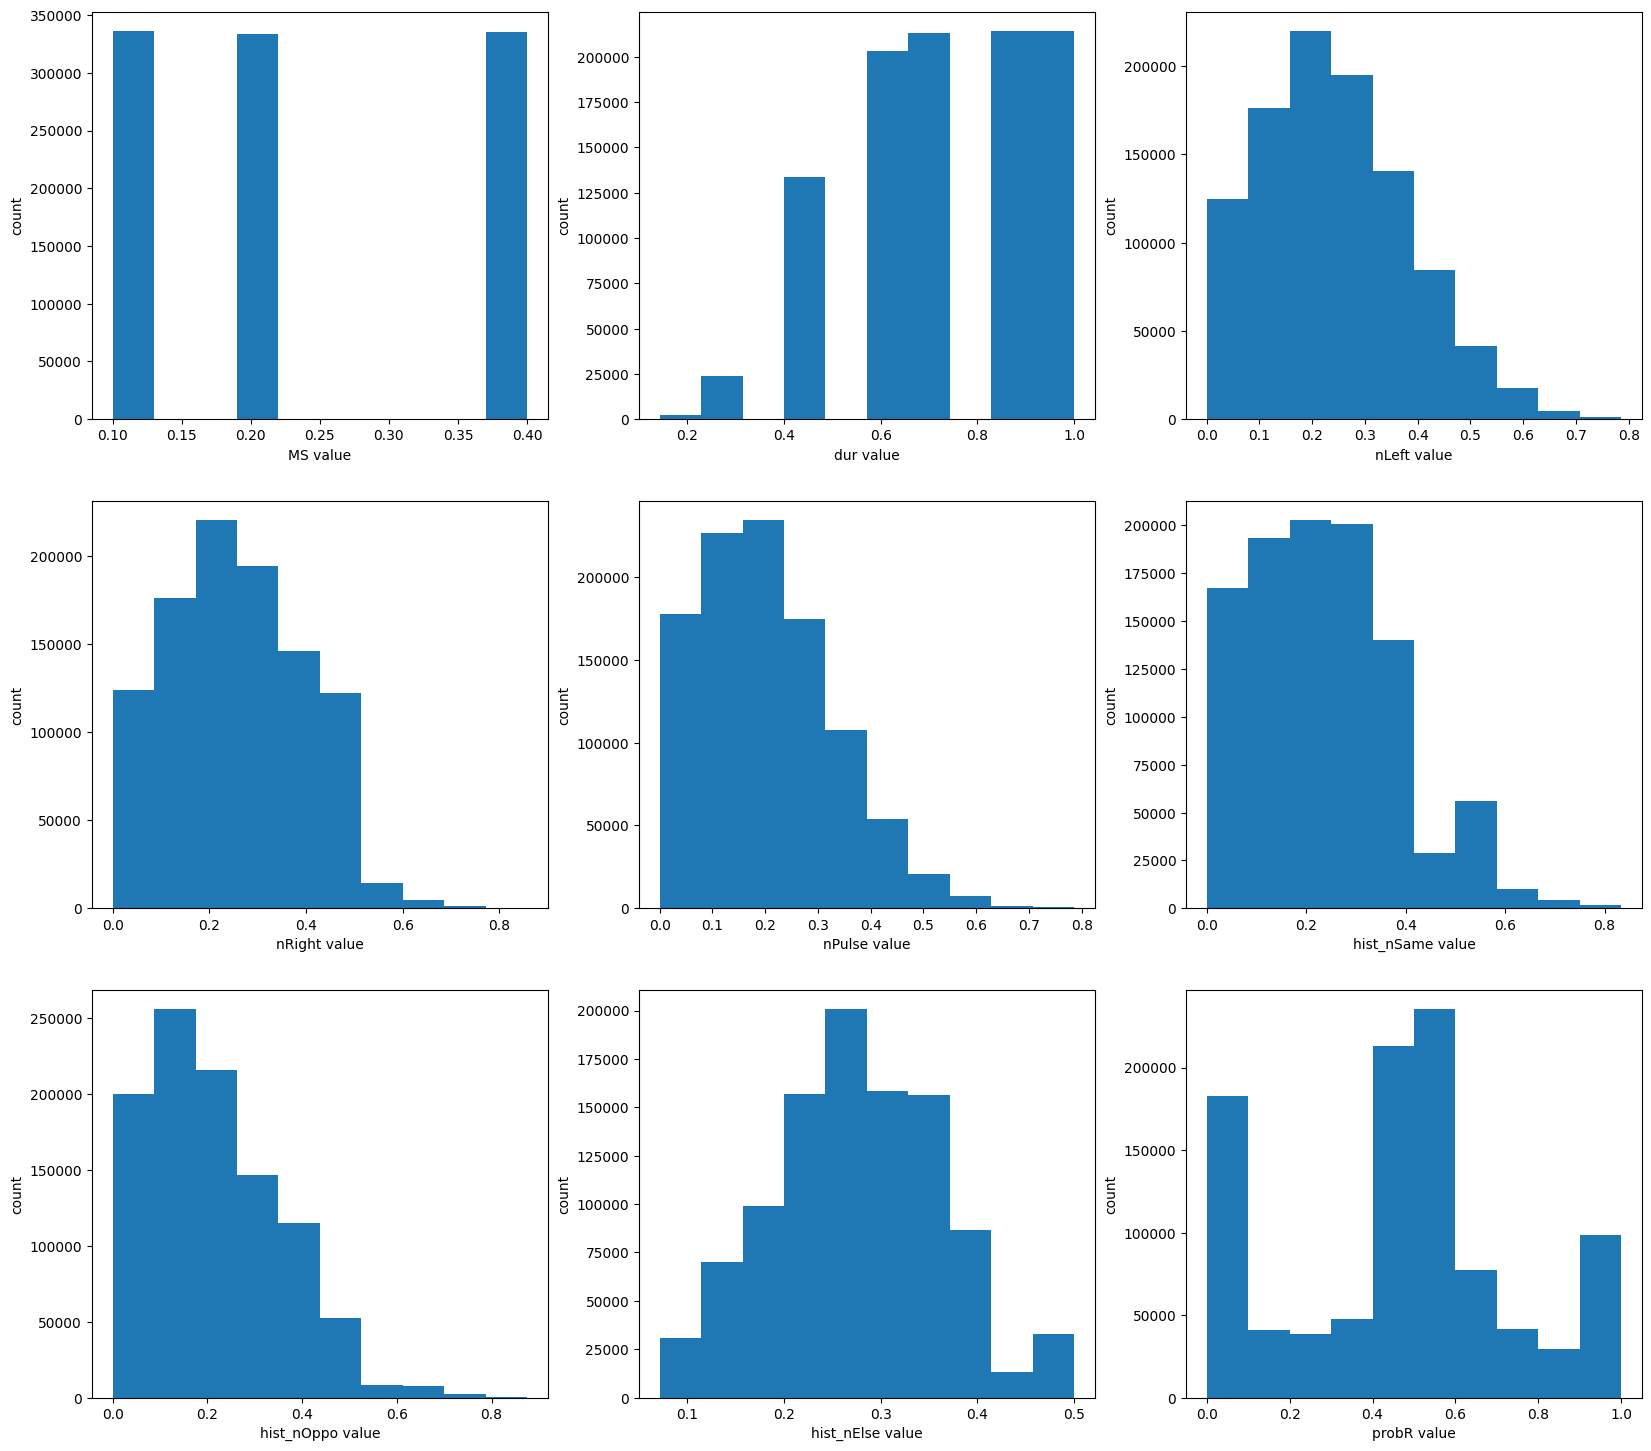

In [94]:
fig = plt.figure(figsize=(20, 18))
gs = mpl.gridspec.GridSpec(3,3)
for i in range(3):
    for j in range(3):
        
        
        ax = plt.subplot(gs[i,j])
        plt.hist(x[:, i*3+j],bins=10)
           
        if i*3+j == 0:
            plt.xlabel('MS value')
        if i*3+j == 1:
            plt.xlabel('dur value')
        if i*3+j == 2:
            plt.xlabel('nLeft value')
        if i*3+j == 3:
            plt.xlabel('nRight value')
        if i*3+j == 4:
            plt.xlabel('nPulse value')
        if i*3+j == 5:
            plt.xlabel('hist_nSame value')
        if i*3+j == 6:
            plt.xlabel('hist_nOppo value')
        if i*3+j == 7:
            plt.xlabel('hist_nElse value')
        if i*3+j == 8:
            plt.xlabel('probR value')
        plt.ylabel('count')

## check trial data

In [6]:
from parse_data.parse_trial_data import parse_trial_data
trials = parse_trial_data('../../data/trials.mat')

In [7]:
trials.keys()

dict_keys(['pulse', 'dur', 'MS', 'nRight', 'nLeft', 'nPulse', 'hist_nRelse', 'hist_nLelse', 'hist_nRsame', 'hist_nLsame', 'hist_nRoppo', 'hist_nLoppo', 'chooseR', 'subjID', 'correct', 'info'])

In [9]:
print('num of trials')
idx = []
for i in range(1,16):
    print(np.sum(trials['subjID']==i), end=' ')
    idx.append(trials['subjID']==i)

num of trials
14994 14700 14700 14700 14700 14700 14700 14700 14700 14700 14700 14700 14000 8820 14700 

In [30]:
# check MS composition
# for i in range(15):
for i in range(15):
    unq,cnt = np.unique(trials['MS'][idx[i]], return_counts=True)
    print(f'ID {i+1}', 'unique: ', unq, 'cnt: ', cnt)

ID 1 unique:  [0.1 0.2 0.4] cnt:  [4998 4998 4998]
ID 2 unique:  [0.2 0.4 0.8] cnt:  [4900 4900 4900]
ID 3 unique:  [0.2 0.4 0.8] cnt:  [4900 4900 4900]
ID 4 unique:  [0.2 0.4 0.8] cnt:  [4900 4900 4900]
ID 5 unique:  [0.2 0.4 0.8] cnt:  [4900 4900 4900]
ID 6 unique:  [0.2 0.4 0.8] cnt:  [4900 4900 4900]
ID 7 unique:  [0.2 0.4 0.8] cnt:  [4900 4900 4900]
ID 8 unique:  [0.2 0.4 0.8] cnt:  [4900 4900 4900]
ID 9 unique:  [0.2 0.4 0.8] cnt:  [4900 4900 4900]
ID 10 unique:  [0.2 0.4 0.8] cnt:  [4900 4900 4900]
ID 11 unique:  [0.2 0.4 0.8] cnt:  [4900 4900 4900]
ID 12 unique:  [0.2 0.4 0.8] cnt:  [4900 4900 4900]
ID 13 unique:  [0.05 0.1  0.2  0.4 ] cnt:  [3500 3500 3500 3500]
ID 14 unique:  [0.1 0.2 0.4] cnt:  [2940 2940 2940]
ID 15 unique:  [0.1 0.2 0.4] cnt:  [4900 4900 4900]


In [50]:
4900*3

14700

In [34]:
# check dur composition
for i in range(15):
    dur, cnt = np.unique(trials['dur'][idx[i]], return_counts=True)
    print(f'ID: {i+1}', '\ndur: ', dur, '\ncnt: ',cnt)

ID: 1 
dur:  [ 3  5  7  9 11 13 15] 
cnt:  [2142 2142 2142 2142 2142 2142 2142]
ID: 2 
dur:  [ 3  5  7  9 11 13 15] 
cnt:  [2100 2100 2100 2100 2100 2100 2100]
ID: 3 
dur:  [ 3  5  7  9 11 13 15] 
cnt:  [2100 2100 2100 2100 2100 2100 2100]
ID: 4 
dur:  [ 3  5  7  9 11 13 15] 
cnt:  [2100 2100 2100 2100 2100 2100 2100]
ID: 5 
dur:  [ 3  5  7  9 11 13 15] 
cnt:  [2100 2100 2100 2100 2100 2100 2100]
ID: 6 
dur:  [ 3  5  7  9 11 13 15] 
cnt:  [2100 2100 2100 2100 2100 2100 2100]
ID: 7 
dur:  [ 3  5  7  9 11 13 15] 
cnt:  [2100 2100 2100 2100 2100 2100 2100]
ID: 8 
dur:  [ 3  5  7  9 11 13 15] 
cnt:  [2100 2100 2100 2100 2100 2100 2100]
ID: 9 
dur:  [ 3  5  7  9 11 13 15] 
cnt:  [2100 2100 2100 2100 2100 2100 2100]
ID: 10 
dur:  [ 3  5  7  9 11 13 15] 
cnt:  [2100 2100 2100 2100 2100 2100 2100]
ID: 11 
dur:  [ 3  5  7  9 11 13 15] 
cnt:  [2100 2100 2100 2100 2100 2100 2100]
ID: 12 
dur:  [ 3  5  7  9 11 13 15] 
cnt:  [2100 2100 2100 2100 2100 2100 2100]
ID: 13 
dur:  [ 3  5  7  9 11 13 15] 

In [48]:
# check L/R/Pause composition
# pause = dur - L-R
pause = trials['dur'] - trials['nLeft'] - trials['nRight'] -1
pause

array([[0],
       [1],
       [0],
       ...,
       [5],
       [2],
       [4]], dtype=uint8)

In [2]:
import numpy as np
value = [1, -1, 0]
a = np.random.choice(value, size=(100,100), p=[0.35, 0.35, 0.3])
a

array([[ 0, -1,  0, ...,  0,  0,  1],
       [-1,  1,  0, ...,  1,  1,  0],
       [-1, -1,  0, ..., -1,  0, -1],
       ...,
       [-1,  0,  0, ...,  0, -1,  1],
       [ 0,  1,  0, ..., -1,  1,  1],
       [ 1,  1,  0, ...,  1,  1, -1]])

In [3]:
np.unique(a, return_counts=True)

(array([-1,  0,  1]), array([3492, 3066, 3442]))

## correctness Subject 正确率

In [70]:
path_data = '../../data'
path_trial_data = os.path.join(path_data, 'trials.mat')
trials = parse_trial_data(path_trial_data)
trials.keys()

dict_keys(['pulse', 'dur', 'MS', 'nRight', 'nLeft', 'nPulse', 'hist_nRelse', 'hist_nLelse', 'hist_nRsame', 'hist_nLsame', 'hist_nRoppo', 'hist_nLoppo', 'chooseR', 'subjID', 'correct', 'info'])

In [71]:
acc_t, acc = [], []
for subjectID in range(1,16):
    idx_subj = trials[ 'subjID' ] == subjectID
    correct = trials['correct'][idx_subj]
    if subjectID == 1:
        time_step = 714*3
    elif subjectID == 14:
        time_step = 420*3
    elif subjectID == 13:
        time_step = 500*4
    else:
        time_step = 700*3 # all MS
    
    _acc_t, _acc = compute_subject_acc(correct, in_time=True, time_step=time_step)
    np.set_printoptions(precision=3)
    
    print(f'S{subjectID} Overall acc: {_acc:.3f} acc in time: {np.array(_acc_t)} ')
    acc_t.append(_acc_t)
    acc.append(_acc)

S1 Overall acc: 0.652 acc in time: [0.786 0.699 0.67  0.636 0.609 0.594 0.591] 
S2 Overall acc: 0.805 acc in time: [0.935 0.839 0.822 0.791 0.783 0.741 0.747] 
S3 Overall acc: 0.872 acc in time: [0.957 0.882 0.875 0.871 0.858 0.839 0.836] 
S4 Overall acc: 0.856 acc in time: [0.974 0.878 0.869 0.837 0.833 0.82  0.804] 
S5 Overall acc: 0.786 acc in time: [0.93  0.831 0.78  0.751 0.736 0.758 0.742] 
S6 Overall acc: 0.798 acc in time: [0.946 0.851 0.806 0.782 0.739 0.755 0.741] 
S7 Overall acc: 0.786 acc in time: [0.912 0.822 0.787 0.779 0.763 0.746 0.724] 
S8 Overall acc: 0.876 acc in time: [0.966 0.904 0.883 0.862 0.849 0.847 0.836] 
S9 Overall acc: 0.765 acc in time: [0.883 0.806 0.774 0.749 0.722 0.715 0.726] 
S10 Overall acc: 0.779 acc in time: [0.898 0.795 0.803 0.763 0.739 0.747 0.73 ] 
S11 Overall acc: 0.781 acc in time: [0.938 0.849 0.796 0.775 0.729 0.708 0.705] 
S12 Overall acc: 0.799 acc in time: [0.949 0.827 0.818 0.789 0.764 0.731 0.741] 
S13 Overall acc: 0.679 acc in time: [

(0.5, 1.0)

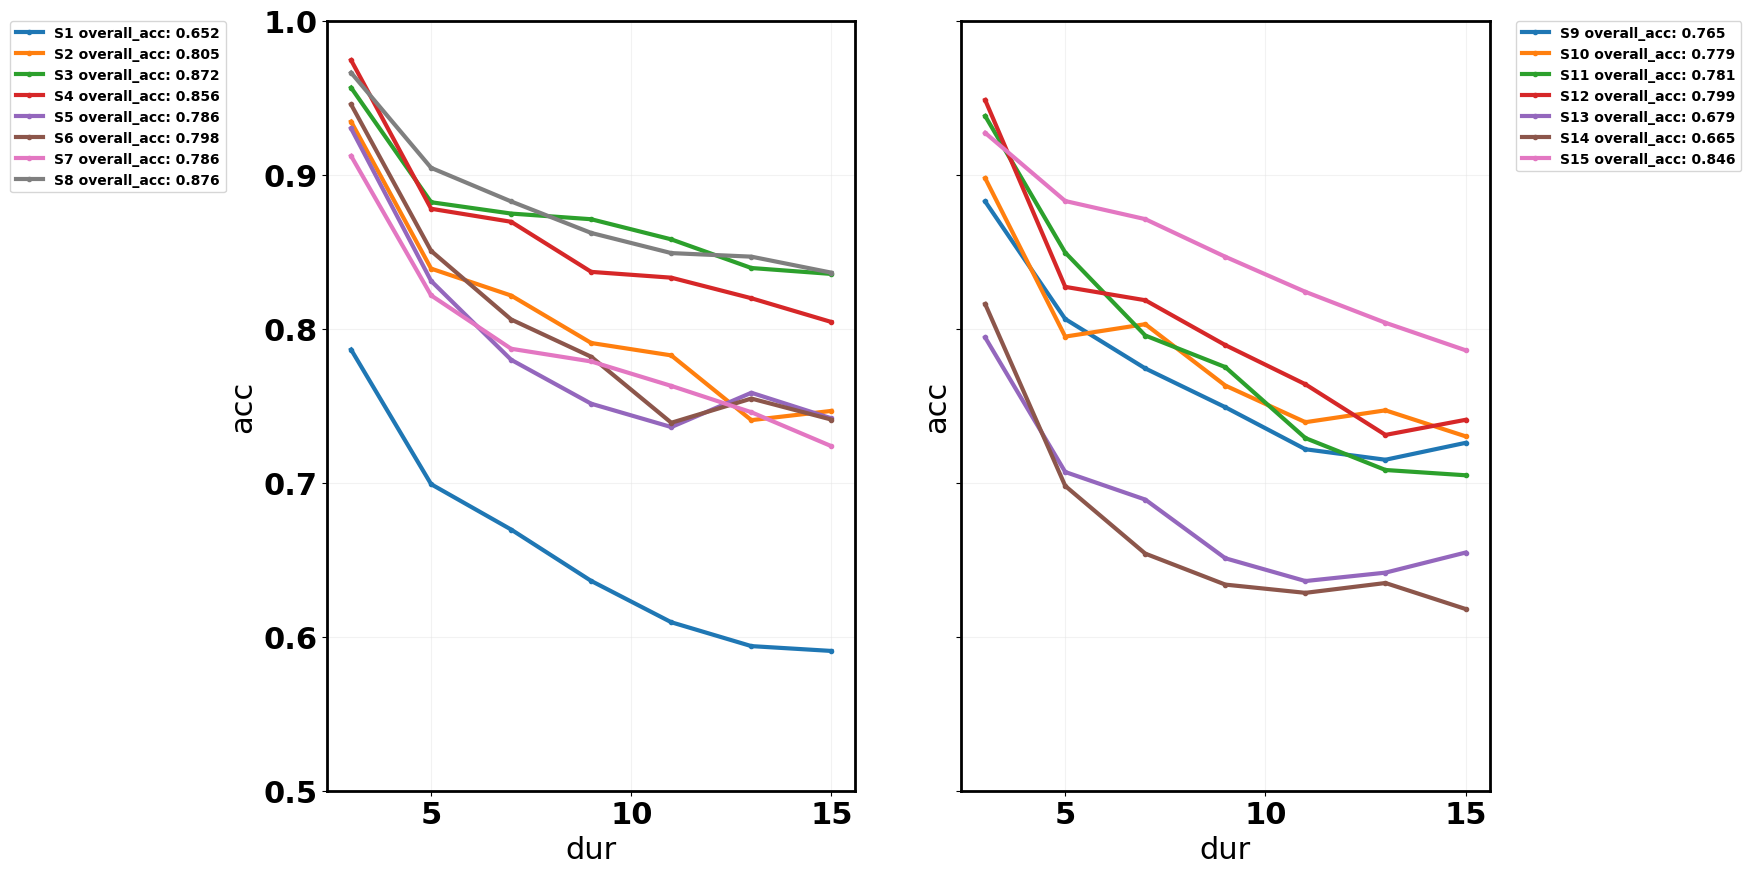

In [72]:
fig, axs = plt.subplots(1,2, figsize=(15,10), sharey=True)
ax = axs[0]
for i in range(0,8):
    ax.plot(np.arange(3,17,2), acc_t[i],'.-', label=f'S{i+1} overall_acc: {acc[i]:.3f}', linewidth=3)
ax.set_xlabel('dur')
ax.set_ylabel('acc')
ax.legend(bbox_to_anchor=(-0.6, 1), loc='upper left', borderaxespad=0., prop={'size': 10})
ax.grid(True, which="major", axis='both', ls="-", color="0.9", alpha=0.5)
ax.set_ylim(0.5,1)

ax = axs[1]
for i in range(8,15):
    ax.plot(np.arange(3,17,2), acc_t[i],'.-', label=f'S{i+1} overall_acc: {acc[i]:.3f}', linewidth=3)
ax.set_xlabel('dur')
ax.set_ylabel('acc')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., prop={'size': 10})
ax.grid(True, which="major", axis='both', ls="-", color="0.9", alpha=0.5)
ax.set_ylim(0.5,1)
# ax.set_yticks([])


Text(0.5, 1.0, 'duration of trials S15')

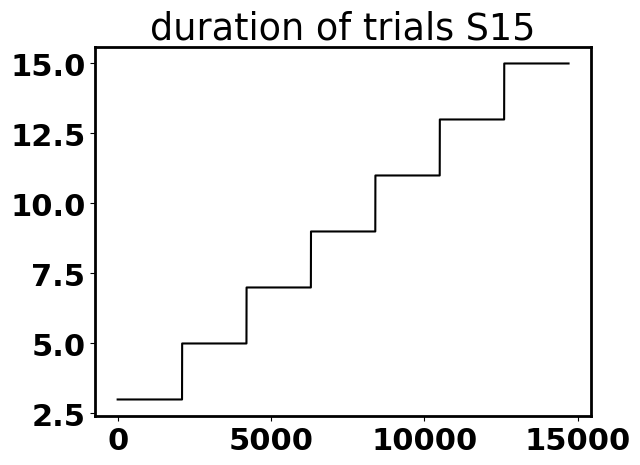

In [73]:
plt.plot(trials['dur'][idx_subj], 'k')
plt.title(f'duration of trials S{subjectID}')

## check 每个人的 prior 的范围

In [74]:
import sys
sys.path.append('../src')

from pathlib import Path

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [75]:
import scipy.io as sio
import tabulate as tab

bias = []
sigma2a = []
sigma2i = []
sigma2s = []
L = []
for subjectID in range(1,16):
    data_path = f'../../data/params/263 models fitPars/data_fitPars_S{subjectID}.mat'
    fitted_params = decode_mat_fitted_parameters(data_path)
    bias.append(fitted_params['bias'])
    sigma2a.append(fitted_params['sigmas'][:,0])
    sigma2i.append(fitted_params['sigmas'][:,1])
    sigma2s.append(fitted_params['sigmas'][:,2])
    _B = fitted_params['BGLS'][:, 0, :]
    _G = fitted_params['BGLS'][:, 1, :]
    _L = fitted_params['BGLS'][:, 2, :]
    _S = fitted_params['BGLS'][:, 3, :]
    _O = fitted_params['BGLS'][:, 4, :]
    _N = fitted_params['BGLS'][:, 5, :]
    
    idx_L0 = ['L0' in i for i in fitted_params['allModelsList']]
    L.append(_L[idx_L0, :][:, 0])
    

         S1     S2     S3     S4     S5     S6     S7     S8     S9    S10    S11    S12    S13    S14    S15
----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----
max    1.37   0.24   0.34   0.19   0.26   0.33   0.18   0.29   0.18   0.33   0.18   0.33   0.32   0.36   0.33
min   -0.4   -0.2   -0.24  -0.12  -0.19  -0.2   -0.36  -0.27  -1.57  -0.95  -1.66  -0.4   -0.83  -0.41  -0.27
mean   0.08  -0.01  -0.03   0.02   0.04   0.03  -0.01  -0     -0.18  -0.11  -0.08  -0.03  -0.06  -0.04   0.02
std    0.13   0.03   0.05   0.03   0.05   0.04   0.03   0.03   0.23   0.14   0.13   0.05   0.1    0.06   0.04


Text(0, 0.5, 'Subject Acc')

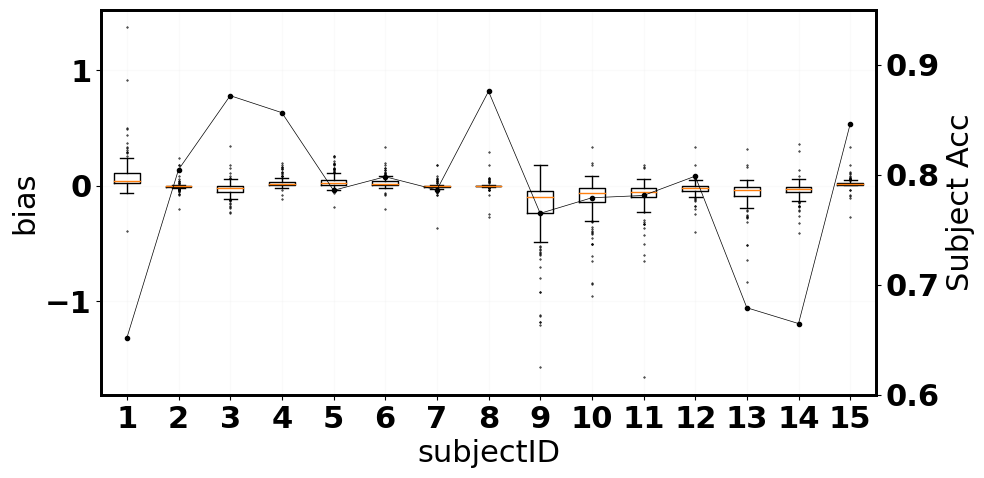

In [86]:
dots = {'marker':'.', 'markersize':1}
# colors for traces
col_min = 2
num_colors = 5
cm1 = mpl.cm.Blues
col1 = [cm1(1.0 * i / num_colors) for i in range(col_min, num_colors)]

fig = plt.figure(figsize=(10,5))
gs = mpl.gridspec.GridSpec(1,1)#, height_ratios=[1, 1])

ax = plt.subplot(gs[0, 0])
plt.boxplot(bias, showfliers=True, flierprops=dots)
plt.xlabel("subjectID")
plt.ylabel("bias")
ax.grid(True, which="major", axis='both', ls="-", color="0.9", alpha=0.2)

max_values  = np.round(np.max(bias, axis=1), 2)
min_values  = np.round(np.min(bias, axis=1),2)
mean_values = np.round(np.mean(bias, axis=1),2)
std_values  = np.round(np.std(bias, axis=1),2)

# np show 2 decimal points
np.set_printoptions(precision=2)
rows = [['max', *max_values], ['min', *min_values], ['mean', *mean_values], ['std', *std_values]]
cols = [f'S{i}' for i in range(1,16)]
print(tab.tabulate(rows, headers=cols, tablefmt='markdown'))

ax2 = ax.twinx()
ax2.plot(range(1,16), acc, '.-', color='k', linewidth=0.5)
ax2.set_ylim([0.6, 0.95])
ax2.set_ylabel('Subject Acc')

         S1    S2    S3    S4     S5     S6     S7    S8     S9    S10    S11    S12    S13    S14    S15
----  -----  ----  ----  ----  -----  -----  -----  ----  -----  -----  -----  -----  -----  -----  -----
max   69.45  6.86  7.02  7.49  15.28  14.27  16.63  3.76  14.5   19.25  35.19   4.17  23.82  16.51   2.95
min    0     0     0     0      0.01   0      0     0      0      0      0      0      0      0      0
mean   0.8   0.27  0.32  0.31   0.71   0.45   0.71  0.18   0.54   0.52   0.57   0.12   0.45   0.51   0.11
std    4.94  0.8   0.78  0.87   1.94   1.17   2.04  0.46   1.7    1.8    2.79   0.33   1.9    1.6    0.31


Text(0, 0.5, 'Subject Acc')

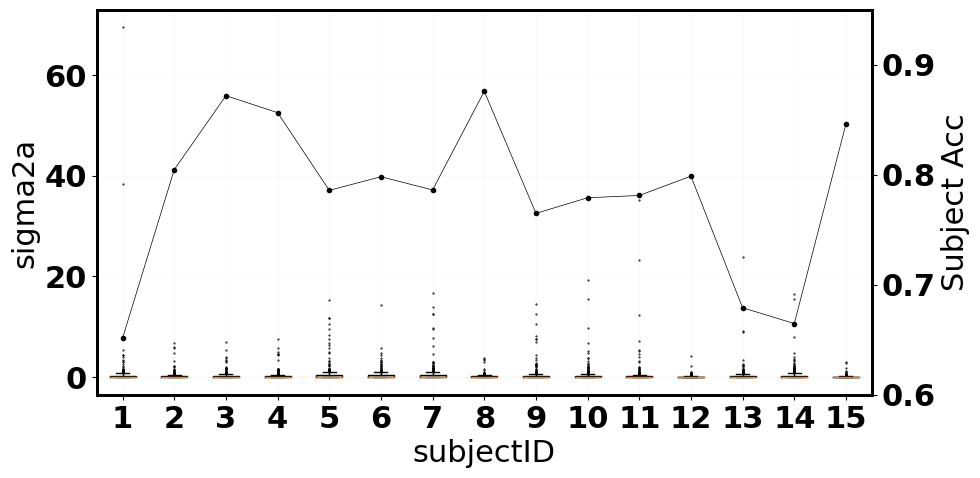

In [87]:
fig = plt.figure(figsize=(10,5))
gs = mpl.gridspec.GridSpec(1,1)#, height_ratios=[1, 1])
ax = plt.subplot(gs[0, 0])
plt.boxplot(sigma2a, showfliers=True, flierprops=dots)
plt.xlabel("subjectID")
plt.ylabel("sigma2a")
ax.grid(True, which="major", axis='both', ls="-", color="0.9", alpha=0.2)

max_values  = np.round(np.max(sigma2a, axis=1), 2)
min_values  = np.round(np.min(sigma2a, axis=1),2)
mean_values = np.round(np.mean(sigma2a, axis=1),2)
std_values  = np.round(np.std(sigma2a, axis=1),2)

# np show 2 decimal points
np.set_printoptions(precision=2)
rows = [['max', *max_values], ['min', *min_values], ['mean', *mean_values], ['std', *std_values]]
cols = [f'S{i}' for i in range(1,16)]
print(tab.tabulate(rows, headers=cols, tablefmt='markdown'))

ax2 = ax.twinx()
ax2.plot(range(1,16), acc, '.-', color='k', linewidth=0.5)
ax2.set_ylim([0.6, 0.95])
ax2.set_ylabel('Subject Acc')

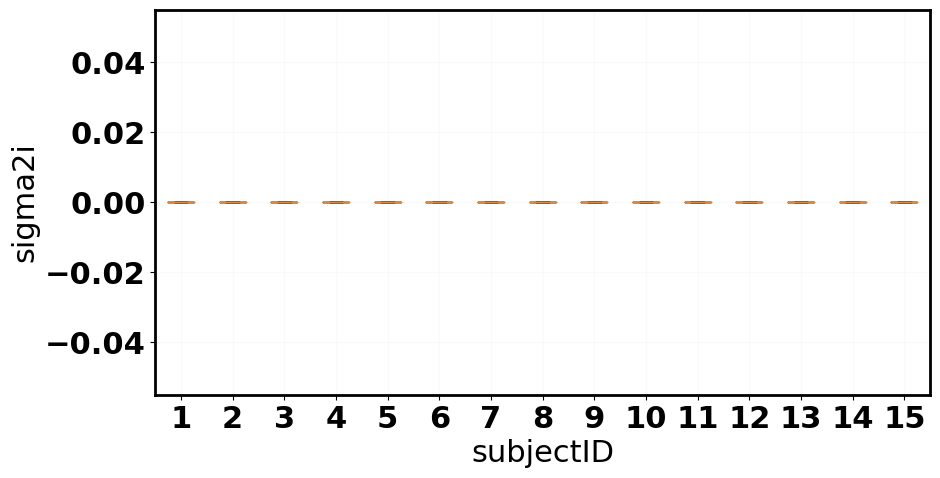

In [120]:
fig = plt.figure(figsize=(10,5))
gs = mpl.gridspec.GridSpec(1,1)#, height_ratios=[1, 1])
ax = plt.subplot(gs[0, 0])
plt.boxplot(sigma2i, showfliers=True, flierprops=dots)
plt.xlabel("subjectID")
plt.ylabel("sigma2i")
ax.grid(True, which="major", axis='both', ls="-", color="0.9", alpha=0.2)

          S1    S2     S3    S4      S5    S6     S7    S8    S9    S10    S11    S12     S13     S14    S15
----  ------  ----  -----  ----  ------  ----  -----  ----  ----  -----  -----  -----  ------  ------  -----
max     1.34  0.37   0.37  0.4     0.37  0.36   0.37  0.37  0.39   0.35   0.43   0.59    0.4     0.92   0.37
min   -12.39  0.01  -2.96  0.04  -16.52  0.01  -9.14  0     0.02   0      0      0     -14.88  -13.89  -0.84
mean   -0.25  0.33  -0.03  0.18   -0.74  0.23  -0.76  0.12  0.17   0.2    0.34   0.51   -1.18    0.12   0.07
std     1.41  0.06   0.29  0.04    1.41  0.04   1.14  0.04  0.05   0.04   0.11   0.1     1.97    1      0.07


Text(0, 0.5, 'Subject Acc')

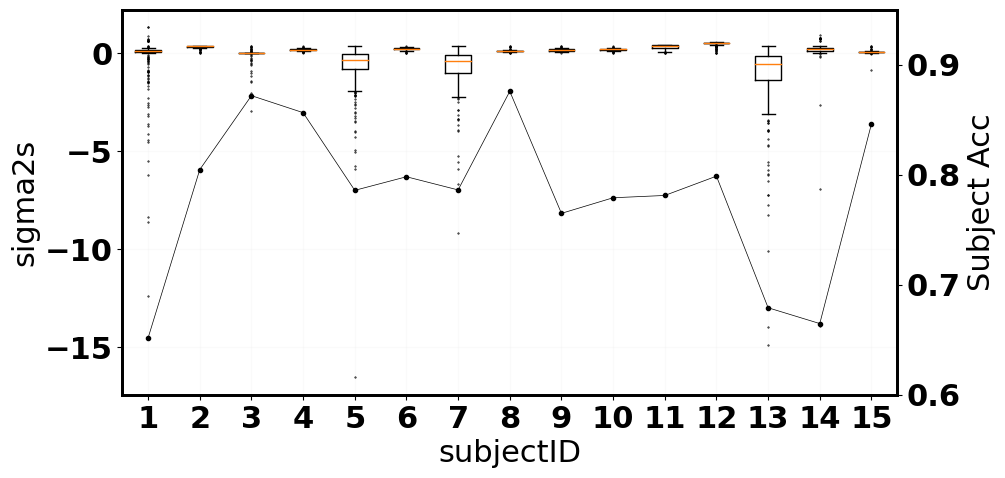

In [88]:
fig = plt.figure(figsize=(10,5))
gs = mpl.gridspec.GridSpec(1,1)#, height_ratios=[1, 1])
ax = plt.subplot(gs[0, 0])
plt.boxplot(sigma2s, showfliers=True, flierprops=dots)
plt.xlabel("subjectID")
plt.ylabel("sigma2s")
ax.grid(True, which="major", axis='both', ls="-", color="0.9", alpha=0.2)

max_values  = np.round(np.max(sigma2s, axis=1), 2)
min_values  = np.round(np.min(sigma2s, axis=1),2)
mean_values = np.round(np.mean(sigma2s, axis=1),2)
std_values  = np.round(np.std(sigma2s, axis=1),2)

# np show 2 decimal points
np.set_printoptions(precision=2)
rows = [['max', *max_values], ['min', *min_values], ['mean', *mean_values], ['std', *std_values]]
cols = [f'S{i}' for i in range(1,16)]
print(tab.tabulate(rows, headers=cols, tablefmt='markdown'))

ax2 = ax.twinx()
ax2.plot(range(1,16), acc, '.-', color='k', linewidth=0.5)
ax2.set_ylim([0.6, 0.95])
ax2.set_ylabel('Subject Acc')

         S1     S2     S3     S4     S5     S6     S7     S8     S9    S10    S11    S12    S13    S14    S15
----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----
max    3.57   1.56   2.29   1.93   1.29   1.29   1.29   1.73   1.73   1.73   2.29   2.72   2.29   2.29   1.73
min   -1.02  -1.11  -0.43  -0.82  -1.2   -1.17  -0.6   -0.75  -0.62  -0.62  -1.06  -1.01  -0.81  -0.62  -0.87
mean   0.37  -0.01   0.06   0.2   -0.58  -0.42  -0.1    0.16   0.19   0.18   0.07   0.29   0.01   0.33  -0.29
std    0.84   0.57   0.42   0.52   0.32   0.48   0.29   0.42   0.45   0.48   0.64   0.64   0.57   0.57   0.42


Text(0, 0.5, 'Subject Acc')

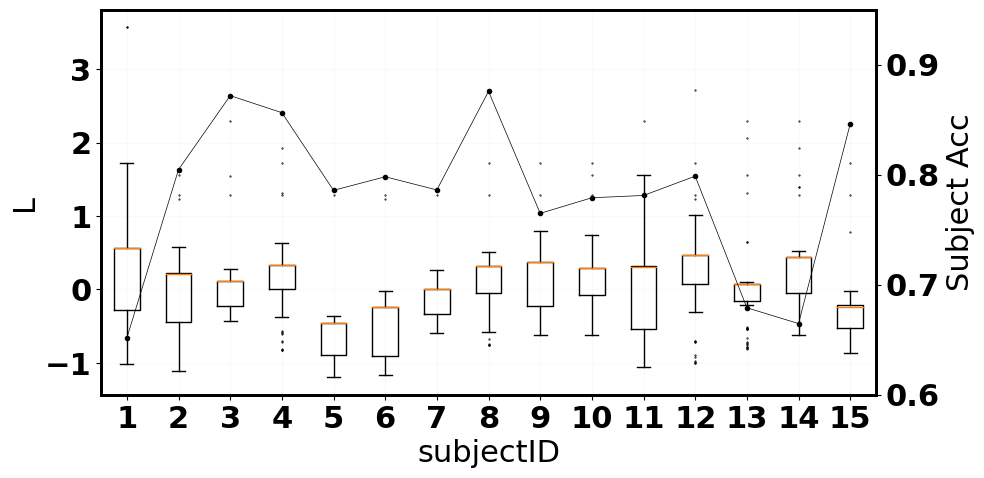

In [89]:
fig = plt.figure(figsize=(10,5))
gs = mpl.gridspec.GridSpec(1,1)#, height_ratios=[1, 1])
ax = plt.subplot(gs[0, 0])
plt.boxplot(L, showfliers=True, flierprops=dots)
plt.xlabel("subjectID")
plt.ylabel("L")
ax.grid(True, which="major", axis='both', ls="-", color="0.9", alpha=0.2)

max_values  = np.round(np.max(L, axis=1), 2)
min_values  = np.round(np.min(L, axis=1),2)
mean_values = np.round(np.mean(L, axis=1),2)
std_values  = np.round(np.std(L, axis=1),2)

# np show 2 decimal points
np.set_printoptions(precision=2)
rows = [['max', *max_values], ['min', *min_values], ['mean', *mean_values], ['std', *std_values]]
cols = [f'S{i}' for i in range(1,16)]
print(tab.tabulate(rows, headers=cols, tablefmt='markdown'))

ax2 = ax.twinx()
ax2.plot(range(1,16), acc, '.-', color='k', linewidth=0.5)
ax2.set_ylim([0.6, 0.95])
ax2.set_ylabel('Subject Acc')